# AML 3104 Neural Networks and Deep Learning - Final Project 

## COVID - 19 Detection for using CNNs

### Group Members

- SAI VARUN KOLLIPARA - C0828403
- PRAMOD REDDY GURRALA – C0850493
- DEEKSHA NAIKAP – C0835440
- BHANU PRAKASH MAHADEVUNI – C0850515

### 1. Package Importing

In [1]:
import pandas as pd
import os
import shutil

## 2. Data Collection

In [2]:
#Create the data for positive samples 

FILE_PATH = ".\metadata.csv"
IMAGE_PATH = ".\images"

In [3]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [4]:
df

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,479,0.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,United Kingdom,images,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. Rou...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
946,479,70.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,United Kingdom,images,ff33c406392b968d483174c97eb857_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. The...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
947,480,NaN,M,26.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,images,000001-266.jpg,NaN,https://www.eurorad.org/case/947,CC BY-NC-SA 4.0,fire-eater accidentally ingested a paraffin mi...,NaN,NaN
948,481,NaN,M,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,images,000001-272.jpg,NaN,https://www.eurorad.org/case/934,CC BY-NC-SA 4.0,"The patient, a heavy smoker, was referred to t...",NaN,NaN


In [5]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [6]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

## 2.1 Loading Datasets

In [7]:
TARGET_DIR = "Dataset/Train/Covid"

In [8]:
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created")

In [9]:
#Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0

In [10]:
for(i,row) in df.iterrows():
    if row["finding"] == "Pneumonia/Viral/COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
        print("Moving Image",cnt)
        cnt+=1

Moving Image 0
Moving Image 1
Moving Image 2
Moving Image 3
Moving Image 4
Moving Image 5
Moving Image 6
Moving Image 7
Moving Image 8
Moving Image 9
Moving Image 10
Moving Image 11
Moving Image 12
Moving Image 13
Moving Image 14
Moving Image 15
Moving Image 16
Moving Image 17
Moving Image 18
Moving Image 19
Moving Image 20
Moving Image 21
Moving Image 22
Moving Image 23
Moving Image 24
Moving Image 25
Moving Image 26
Moving Image 27
Moving Image 28
Moving Image 29
Moving Image 30
Moving Image 31
Moving Image 32
Moving Image 33
Moving Image 34
Moving Image 35
Moving Image 36
Moving Image 37
Moving Image 38
Moving Image 39
Moving Image 40
Moving Image 41
Moving Image 42
Moving Image 43
Moving Image 44
Moving Image 45
Moving Image 46
Moving Image 47
Moving Image 48
Moving Image 49
Moving Image 50
Moving Image 51
Moving Image 52
Moving Image 53
Moving Image 54
Moving Image 55
Moving Image 56
Moving Image 57
Moving Image 58
Moving Image 59
Moving Image 60
Moving Image 61
Moving Image 62
Mo

In [11]:
print(cnt)

196


In [12]:
# Sampling of Images from Kaggle Data,As we have 143 around covid images so we will have 143 around normal images of xray

import random
KAGGLE_FILE_PATH = "inp\\train\\NORMAL"
TARGET_NORMAL_DIR = "Dataset\\Train\\Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")
    
image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(196):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
    print("Moved",i)

Moved 0
Moved 1
Moved 2
Moved 3
Moved 4
Moved 5
Moved 6
Moved 7
Moved 8
Moved 9
Moved 10
Moved 11
Moved 12
Moved 13
Moved 14
Moved 15
Moved 16
Moved 17
Moved 18
Moved 19
Moved 20
Moved 21
Moved 22
Moved 23
Moved 24
Moved 25
Moved 26
Moved 27
Moved 28
Moved 29
Moved 30
Moved 31
Moved 32
Moved 33
Moved 34
Moved 35
Moved 36
Moved 37
Moved 38
Moved 39
Moved 40
Moved 41
Moved 42
Moved 43
Moved 44
Moved 45
Moved 46
Moved 47
Moved 48
Moved 49
Moved 50
Moved 51
Moved 52
Moved 53
Moved 54
Moved 55
Moved 56
Moved 57
Moved 58
Moved 59
Moved 60
Moved 61
Moved 62
Moved 63
Moved 64
Moved 65
Moved 66
Moved 67
Moved 68
Moved 69
Moved 70
Moved 71
Moved 72
Moved 73
Moved 74
Moved 75
Moved 76
Moved 77
Moved 78
Moved 79
Moved 80
Moved 81
Moved 82
Moved 83
Moved 84
Moved 85
Moved 86
Moved 87
Moved 88
Moved 89
Moved 90
Moved 91
Moved 92
Moved 93
Moved 94
Moved 95
Moved 96
Moved 97
Moved 98
Moved 99
Moved 100
Moved 101
Moved 102
Moved 103
Moved 104
Moved 105
Moved 106
Moved 107
Moved 108
Moved 109
Moved 110


In [13]:
TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

## 3. Model Building Architecture


## Pre Trained Model

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 36s 0us/step


In [18]:
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [19]:
# Define the path to your dataset
train_data_dir = "Dataset/Train"
validation_data_dir = "Dataset/Val"

In [20]:
# Define the number of classes in your dataset
num_classes = 2

# Define the input size of your images
input_size = (224, 224)

In [21]:
# Instantiate the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))

In [22]:
# Add a global average pooling layer and a fully connected output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [23]:
# Define the model to be trained
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
# Freeze the weights of the pre-trained layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# Define the loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Define data generators for data augmentation and image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# Define the batch size and number of epochs for training
batch_size = 32
epochs = 10

In [28]:
# Generate batches of augmented training data and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 1537 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [29]:
# Train the model using the generated data
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

C:\Users\gruha\AppData\Local\Temp/ipykernel_12136/1175499621.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
48/48 [==============================] - 80s 2s/step - loss: 0.5283 - accuracy: 0.8126 - val_loss: 1.0093 - val_accuracy: 0.5000
Epoch 2/10
48/48 [==============================] - 79s 2s/step - loss: 0.3228 - accuracy: 0.8738 - val_loss: 0.9210 - val_accuracy: 0.5000
Epoch 3/10
48/48 [==============================] - 79s 2s/step - loss: 0.2825 - accuracy: 0.8804 - val_loss: 0.6378 - val_accuracy: 0.4688
Epoch 4/10
48/48 [==============================] - 89s 2s/step - loss: 0.2354 - accuracy: 0.9043 - val_loss: 0.6006 - val_accuracy: 0.6875
Epoch 5/10
48/48 [==============================] - 76s 2s/step - loss: 0.2345 - accuracy: 0.9010 - val_loss: 0.8728 - val_accuracy: 0.5000
Epoch 6/10
48/48 [==============================] - 109s 2s/step - loss: 0.2051 - accuracy: 0.9232 - val_loss: 0.5121 - val_accuracy: 0.7188
Epoch 7/10
48/48 [==============================] - 109s 2s/step - loss: 0.1746 - accuracy: 0.9402 - val_loss: 0.3656 - val_accuracy: 0.8125
Epoch 8/10
48/48 [

## Saving Pre Trained Model

In [31]:
model.save('pre_model.h5')

C:\Users\gruha\miniconda3\envs\ash_off\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Visualizing Pre Trained Model

In [38]:
img_size = (224, 224)
batch_size = 32

In [39]:
# Create the train and validation data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_data = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1537 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [40]:
import matplotlib.pyplot as plt

# Define the training history
history = model.fit(train_data, epochs=10, validation_data=validation_data)

# Extract the training and validation accuracy and loss values
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
else:
    print("Error: Accuracy values not found in history")
    train_acc = []
    val_acc = []

if 'loss' in history.history and 'val_loss' in history.history:
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
else:
    print("Error: Loss values not found in history")
    train_loss = []
    val_loss = []


Epoch 1/10
49/49 [==============================] - 67s 1s/step - loss: 0.2172 - accuracy: 0.9297 - val_loss: 0.2669 - val_accuracy: 0.9000
Epoch 2/10
49/49 [==============================] - 69s 1s/step - loss: 0.1404 - accuracy: 0.9512 - val_loss: 0.2929 - val_accuracy: 0.8500
Epoch 3/10
49/49 [==============================] - 65s 1s/step - loss: 0.1377 - accuracy: 0.9473 - val_loss: 0.1932 - val_accuracy: 0.9000
Epoch 4/10
49/49 [==============================] - 65s 1s/step - loss: 0.1123 - accuracy: 0.9636 - val_loss: 0.1620 - val_accuracy: 0.9833
Epoch 5/10
49/49 [==============================] - 65s 1s/step - loss: 0.1088 - accuracy: 0.9649 - val_loss: 0.1514 - val_accuracy: 0.9833
Epoch 6/10
49/49 [==============================] - 65s 1s/step - loss: 0.1055 - accuracy: 0.9642 - val_loss: 0.2584 - val_accuracy: 0.8667
Epoch 7/10
49/49 [==============================] - 66s 1s/step - loss: 0.0938 - accuracy: 0.9727 - val_loss: 0.2417 - val_accuracy: 0.8667
Epoch 8/10
49/49 [==

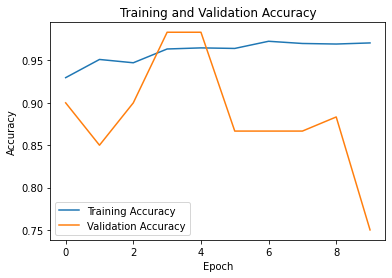

In [42]:
# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

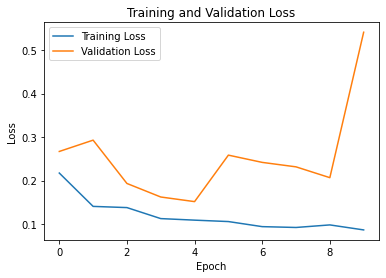

In [43]:
# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

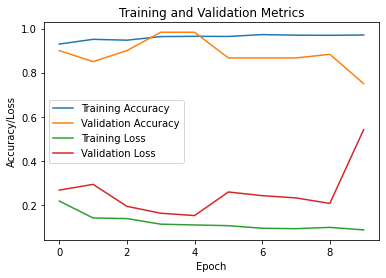

In [44]:
# Plot both accuracy and loss on the same graph
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.show()

## User Defined Model

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [15]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

## 3.1 Train From Scratch

In [17]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [18]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 559 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [20]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


## 3.2 Fit The Model

In [21]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\gruha\AppData\Local\Temp/ipykernel_21184/430255416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 29s 2s/step - loss: 0.6749 - accuracy: 0.6109 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 20s 2s/step - loss: 0.6132 - accuracy: 0.6445 - val_loss: 0.6763 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 19s 2s/step - loss: 0.5747 - accuracy: 0.6289 - val_loss: 0.6094 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 0.4704 - accuracy: 0.6946 - val_loss: 0.5771 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 20s 2s/step - loss: 0.3967 - accuracy: 0.7734 - val_loss: 0.4343 - val_accuracy: 0.6833
Epoch 6/10
8/8 [==============================] - 19s 2s/step - loss: 0.4044 - accuracy: 0.8398 - val_loss: 0.4089 - val_accuracy: 0.7333
Epoch 7/10
8/8 [==============================] - 19s 2s/step - loss: 0.3552 - accuracy: 0.8516 - val_loss: 0.4089 - val_accuracy: 0.7333
Epoch 8/10
8/8 [==================

#### *Loss is very less and accuracy is on point*

In [22]:
model.save("Detection_Covid_19.h5")

In [23]:
model.evaluate_generator(train_generator)

C:\Users\gruha\AppData\Local\Temp/ipykernel_21184/326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.2597852349281311, 0.9534883499145508]

In [24]:
model.evaluate_generator(validation_generator)

C:\Users\gruha\AppData\Local\Temp/ipykernel_21184/3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.28046825528144836, 0.9833333492279053]

## 3.3 Test Images

In [25]:
model = load_model("Detection_Covid_19.h5")

In [26]:
import os

In [27]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

#### Confusion Matrix

In [28]:
y_actual = []
y_test = []

In [30]:
for i in os.listdir("./Dataset/Val/Normal"):
    img = image.load_img("./Dataset/Val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    
    # p = model.predict_classes(img)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    
    y_test.append(predict_x[0,0])
    y_actual.append(1)

In [33]:
for i in os.listdir("./Dataset/Val/Covid"):
    img = image.load_img("./Dataset/Val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)

    # p = model.predict_classes(img)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    
    y_test.append(predict_x[0,0])
    y_actual.append(0)

In [42]:
y_actual = np.array(y_actual)
y_test = np.array(y_test.round())

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm = confusion_matrix(y_actual,y_test)

In [45]:
import seaborn as sns

<AxesSubplot:>

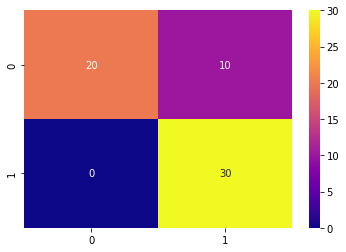

In [46]:
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20 10]
 [ 0 30]]


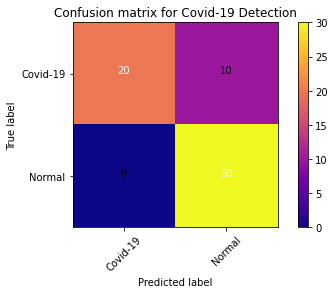

In [49]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


## 4. Model Evaluation

In [50]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **Summarize history for accuracy**

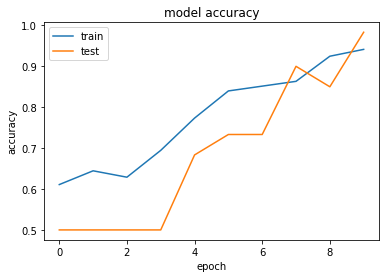

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Summarize history for loss**

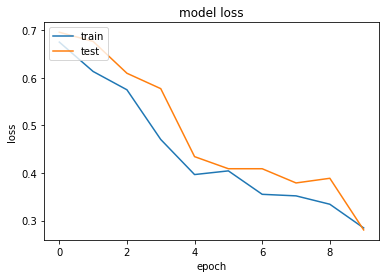

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4.1 Predictions from X-Ray Images

In [55]:
import cv2
from keras.preprocessing import image

In [57]:
xtest_image = image.load_img('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)

results=model.predict(xtest_image) 

In [60]:
results

array([[0.]], dtype=float32)

This Xray Image is of positive covid-19 patient


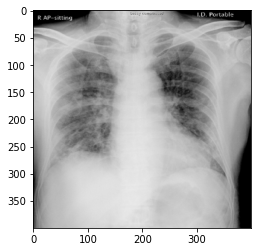

In [58]:
# training_set.class_indices
imggg = cv2.imread('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)

In [59]:
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

Prediction Of Our Model :  Positive For Covid-19


In [62]:
xtest_image = image.load_img('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=model.predict(xtest_image) 

In [66]:
results

array([[1.]], dtype=float32)

In [63]:
# training_set.class_indices

imggg = cv2.imread('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

This Xray Image is of Negative covid-19 patient


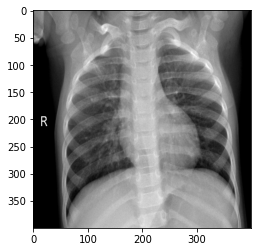

In [64]:
plt.imshow(imggg)

In [65]:
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

Prediction Of Our Model :  Negative for Covid-19
